# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoBeta.png?raw=1" />

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

O valor de M será:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoM.png?raw=1" />

In [50]:
# Cálculo da ordem M do filtro (num_taps)


M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

print(f"Parâmetro M calculado: {M}")

Parâmetro M calculado: 59


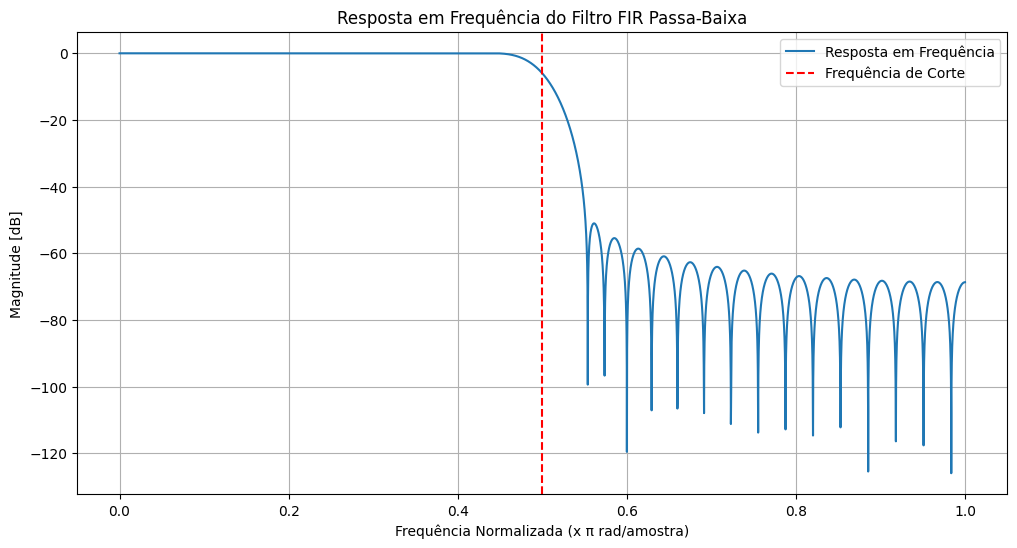

In [51]:


# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

h_fir_original = h_fir


# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(h_fir, worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencias / np.pi, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')

# Configuração do gráfico
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()


### Implementação nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade à quantização.

A *forma em cascata* decompõe o filtro em seções de segunda ordem (SOS). Vamos usar a função tf2sos da SciPy para converter a forma direta em cascata.

In [52]:
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
print("Coeficientes da forma direta (precisão infinita):")
print(h_fir_original)

# **Forma em cascata** - utilizando zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Exibir os coeficientes na forma cascata
print("\nCoeficientes da forma em cascata (precisão infinita):")
print(sos_cascata)

Coeficientes da forma direta (precisão infinita):
[ 4.17648185e-04  5.94785088e-04 -8.07310872e-04 -1.05921259e-03
  1.35476839e-03  1.69859618e-03 -2.09572044e-03 -2.55166312e-03
  3.07256658e-03  3.66535958e-03 -4.33798173e-03 -5.09968820e-03
  5.96146647e-03  6.93661208e-03 -8.04153447e-03 -9.29690297e-03
  1.07293082e-02  1.23737263e-02 -1.42772723e-02 -1.65051020e-02
  1.91500404e-02  2.23490064e-02 -2.63125718e-02 -3.13817978e-02
  3.81470600e-02  4.77252880e-02 -6.25124398e-02 -8.87418671e-02
  1.49276046e-01  4.49898797e-01  4.49898797e-01  1.49276046e-01
 -8.87418671e-02 -6.25124398e-02  4.77252880e-02  3.81470600e-02
 -3.13817978e-02 -2.63125718e-02  2.23490064e-02  1.91500404e-02
 -1.65051020e-02 -1.42772723e-02  1.23737263e-02  1.07293082e-02
 -9.29690297e-03 -8.04153447e-03  6.93661208e-03  5.96146647e-03
 -5.09968820e-03 -4.33798173e-03  3.66535958e-03  3.07256658e-03
 -2.55166312e-03 -2.09572044e-03  1.69859618e-03  1.35476839e-03
 -1.05921259e-03 -8.07310872e-04  5.9478

Projetamos o filtro FIR utilizando a janela de Kaiser, garantindo um controle preciso sobre sua resposta em frequência. Inicialmente, os coeficientes são calculados na forma direta, onde o filtro é aplicado por convolução. Em seguida, os coeficientes são convertidos para a forma em cascata (SOS), melhorando a estabilidade numérica e a implementação em hardware. A conversão é feita utilizando a decomposição em zeros, polos e ganho (ZPK), seguida da reorganização em seções de segunda ordem. Esse processo permite uma implementação eficiente do filtro, minimizando erros de arredondamento e preservando a precisão da resposta.

In [88]:
import numpy as np
import scipy.signal as signal
import pandas as pd

# Definir parâmetros do filtro
M = 59  # Ordem do filtro
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Criar os índices h[0] até h[59] para a forma direta
indices_fir = [f'h[{i}]' for i in range(len(h_fir_original))]

# Criar um DataFrame com os coeficientes quantizados para diferentes precisões (FIR)
df_coeficientes_fir = pd.DataFrame({
    'Índice': indices_fir,
    '6 Casas': np.round(h_fir_original, 6),
    '5 Casas': np.round(h_fir_original, 5),
    '4 Casas': np.round(h_fir_original, 4),
    '3 Casas': np.round(h_fir_original, 3),
    '2 Casas': np.round(h_fir_original, 2),
    '1 Casa': np.round(h_fir_original, 1),
})

# **Forma em cascata (SOS)**
# Criar índices "H₁(Z), H₂(Z), ..., Hₙ(Z)" para cada seção da forma cascata
indices_sos = [f'H_{i+1}(Z)' for i in range(len(sos_cascata))]

# Criar um DataFrame separado para armazenar os coeficientes da forma em cascata, excluindo a0, a1 e a2
column_names = ['b0', 'b1', 'b2']
df_coeficientes_sos = pd.DataFrame({'H_i(Z)': indices_sos})  # Adiciona os índices primeiro

# Adicionar colunas para quantizações de 6 a 1 casas decimais
for prec in [6, 5, 4, 3, 2, 1]:
    for i, col in enumerate(column_names):
        df_coeficientes_sos[f'{prec} Casas {col}'] = np.round(sos_cascata[:, i], prec)

# Salvar em arquivos Excel
df_coeficientes_fir.to_excel("coeficientes_fir.xlsx", index=False)
df_coeficientes_sos.to_excel("coeficientes_sos.xlsx", index=False)

# Exibir os DataFrames dentro do Jupyter Notebook
from IPython.display import display
print("✅ Coeficientes da forma direta (Precisão Finita)")
display(df_coeficientes_fir)
print("✅ Coeficientes da forma em cascata (Precisão Finita)")
display(df_coeficientes_sos)


✅ Coeficientes da forma direta (Precisão Finita)


,Índice,6 Casas,5 Casas,4 Casas,3 Casas,2 Casas,1 Casa
0,h[0],0.000418,0.00042,0.0004,0.000,0.00,0.0
1,h[1],0.000595,0.00059,0.0006,0.001,0.00,0.0
2,h[2],-0.000807,-0.00081,-0.0008,-0.001,-0.00,-0.0
3,h[3],-0.001059,-0.00106,-0.0011,-0.001,-0.00,-0.0
4,h[4],0.001355,0.00135,0.0014,0.001,0.00,0.0
5,h[5],0.001699,0.00170,0.0017,0.002,0.00,0.0
6,h[6],-0.002096,-0.00210,-0.0021,-0.002,-0.00,-0.0
7,h[7],-0.002552,-0.00255,-0.0026,-0.003,-0.00,-0.0
8,h[8],0.003073,0.00307,0.0031,0.003,0.00,0.0
9,h[9],0.003665,0.00367,0.0037,0.004,0.00,0.0


✅ Coeficientes da forma em cascata (Precisão Finita)


,H_i(Z),6 Casas b0,6 Casas b1,6 Casas b2,5 Casas b0,5 Casas b1,5 Casas b2,4 Casas b0,4 Casas b1,4 Casas b2,3 Casas b0,3 Casas b1,3 Casas b2,2 Casas b0,2 Casas b1,2 Casas b2,1 Casas b0,1 Casas b1,1 Casas b2
0,H_1(Z),0.000418,-0.001083,0.000710,0.00042,-0.00108,0.00071,0.0004,-0.0011,0.0007,0.0,-0.001,0.001,0.0,-0.00,0.00,0.0,-0.0,0.0
1,H_2(Z),1.000000,-2.477325,1.694946,1.00000,-2.47732,1.69495,1.0000,-2.4773,1.6949,1.0,-2.477,1.695,1.0,-2.48,1.69,1.0,-2.5,1.7
2,H_3(Z),1.000000,-2.251509,1.685600,1.00000,-2.25151,1.68560,1.0000,-2.2515,1.6856,1.0,-2.252,1.686,1.0,-2.25,1.69,1.0,-2.3,1.7
3,H_4(Z),1.000000,-1.926268,1.669631,1.00000,-1.92627,1.66963,1.0000,-1.9263,1.6696,1.0,-1.926,1.670,1.0,-1.93,1.67,1.0,-1.9,1.7
4,H_5(Z),1.000000,-1.517253,1.643251,1.00000,-1.51725,1.64325,1.0000,-1.5173,1.6433,1.0,-1.517,1.643,1.0,-1.52,1.64,1.0,-1.5,1.6
5,H_6(Z),1.000000,-1.044159,1.596602,1.00000,-1.04416,1.59660,1.0000,-1.0442,1.5966,1.0,-1.044,1.597,1.0,-1.04,1.60,1.0,-1.0,1.6
6,H_7(Z),1.000000,-0.525182,1.497158,1.00000,-0.52518,1.49716,1.0000,-0.5252,1.4972,1.0,-0.525,1.497,1.0,-0.53,1.50,1.0,-0.5,1.5
7,H_8(Z),1.000000,1.987400,1.000000,1.00000,1.98740,1.00000,1.0000,1.9874,1.0000,1.0,1.987,1.000,1.0,1.99,1.00,1.0,2.0,1.0
8,H_9(Z),1.000000,1.890328,1.000000,1.00000,1.89033,1.00000,1.0000,1.8903,1.0000,1.0,1.890,1.000,1.0,1.89,1.00,1.0,1.9,1.0
9,H_10(Z),1.000000,1.708222,1.000000,1.00000,1.70822,1.00000,1.0000,1.7082,1.0000,1.0,1.708,1.000,1.0,1.71,1.00,1.0,1.7,1.0


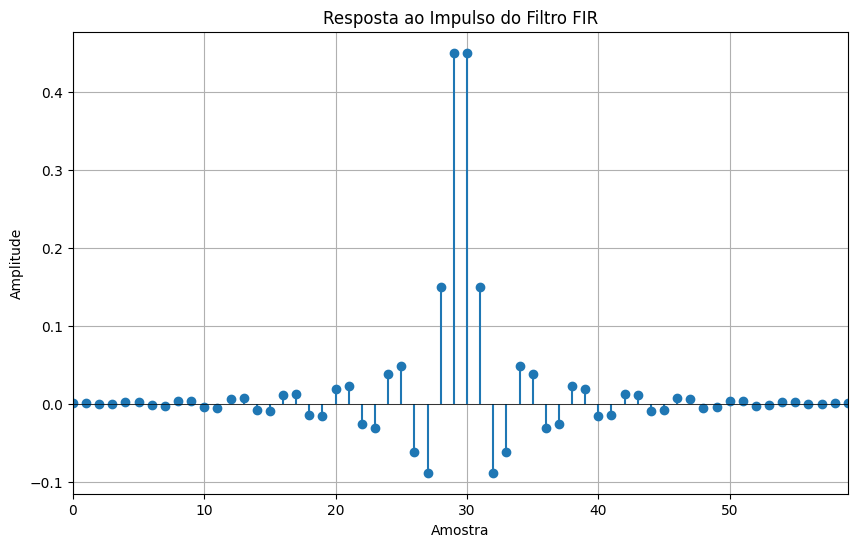

In [53]:
# Código atualizado para garantir que a função exiba o gráfico corretamente
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a resposta ao impulso do filtro FIR
def plot_impulse_response(N, h_fir_original):
    plt.figure(figsize=(10, 6))
    plt.stem(range(N), h_fir_original[:N], basefmt=" ")  # Certificar que o comprimento corresponde a N
    plt.title('Resposta ao Impulso do Filtro FIR')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.xlim(0, N - 1)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)  # Linha central
    plt.grid(True)  # Ativar grade para melhor visualização
    plt.show()

# Garantir que os coeficientes do filtro estão definidos
if 'h_fir_original' in globals():
    plot_impulse_response(len(h_fir_original), h_fir_original)
else:
    print("Erro: h_fir_original não está definido.")


Plotamos a resposta ao impulso de um filtro FIR








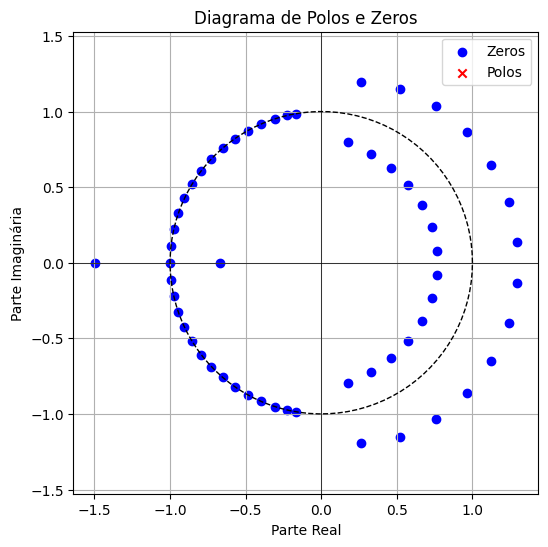

In [62]:
# Obter zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho

# Criar o diagrama de polos e zeros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

# Desenhar o círculo unitário
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

# Configuração do gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Diagrama de Polos e Zeros')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para manter a proporção circular
plt.show()

Essa característica indica que o filtro é causal e estável, pois os polos não se encontram fora do círculo unitário. Além disso, a simetria dos zeros sugere que o filtro é do tipo passa-baixa, pois atenua frequências mais altas enquanto preserva as baixas frequências. o fato de o filtro possuir um zero na frequência
−
𝜋
−π radianos/amostra indica que ele anula a frequência de Nyquist (
𝜔
=
𝜋
). Isso reforça a classificação do filtro como um filtro FIR do Tipo 1 e sugere que ele pode ser um filtro passa-baixa.

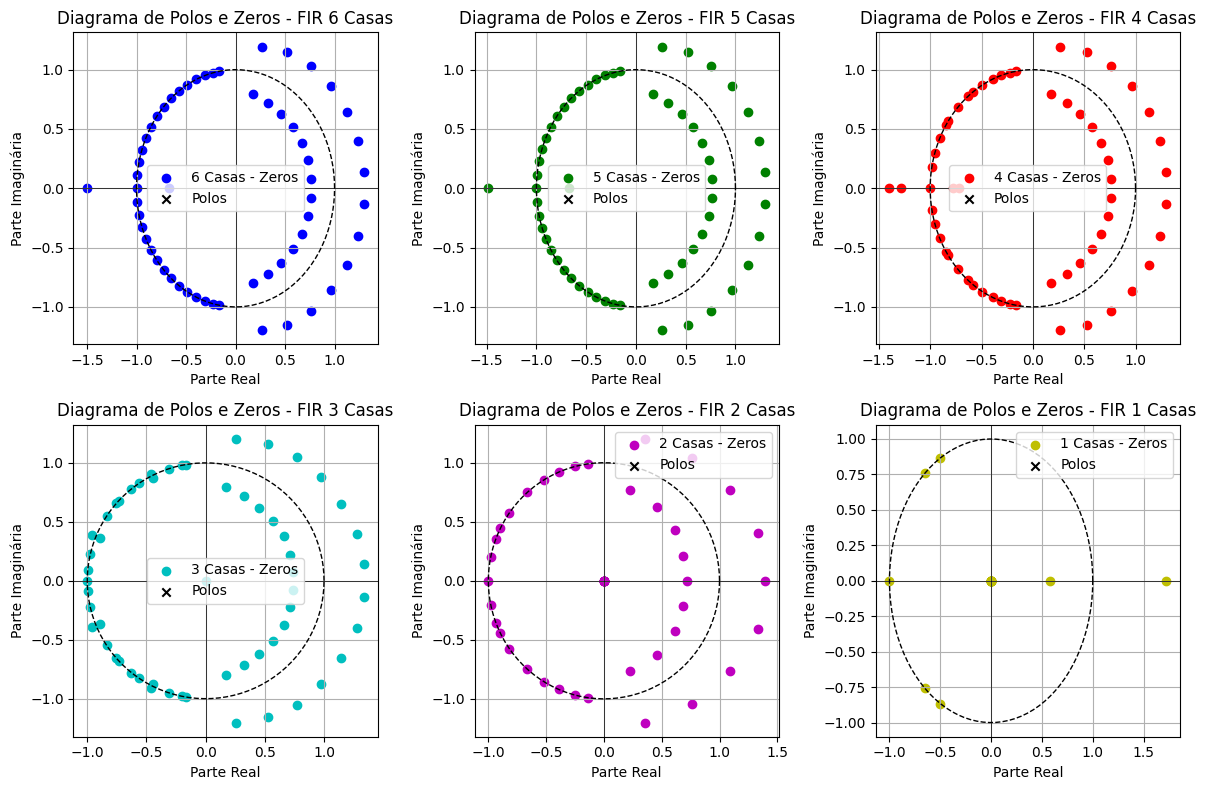

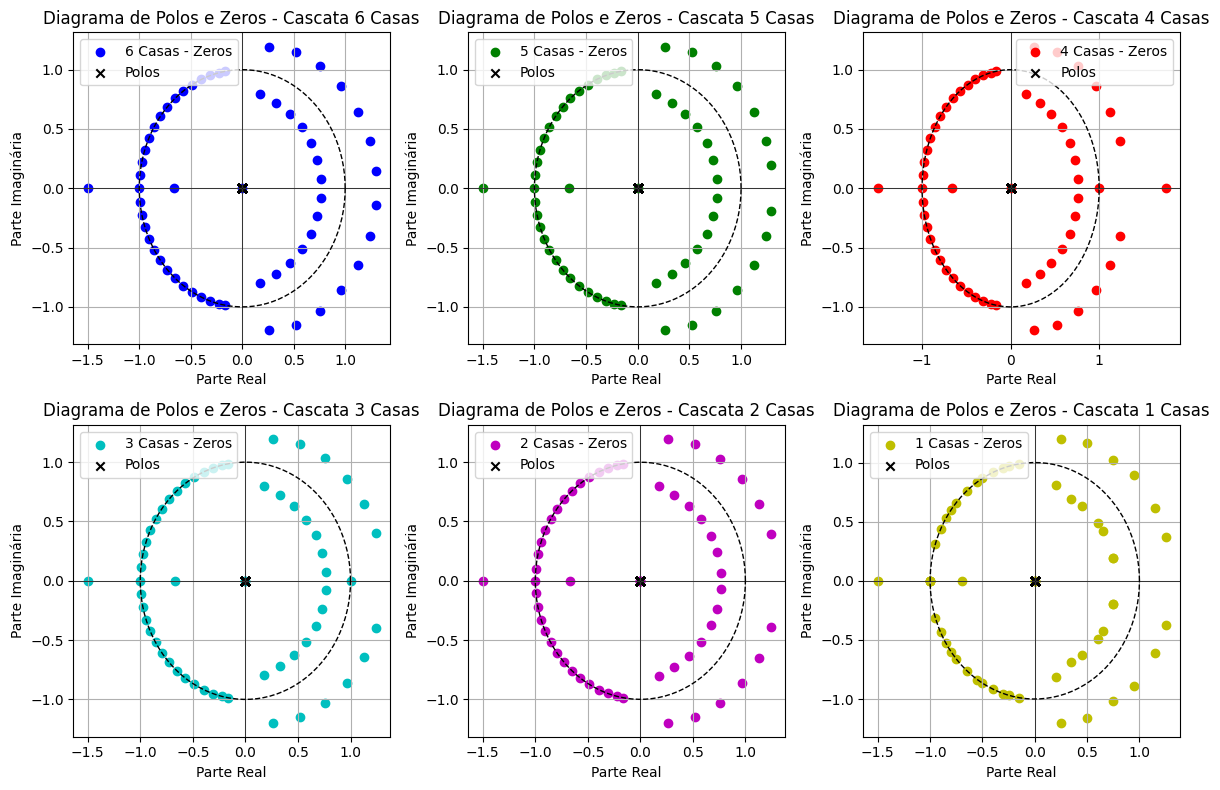

In [90]:

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Definir parâmetros do filtro
M = 59  # Ordem do filtro
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# Converter para forma cascata (SOS)
z_fir, p_fir, k_fir = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho (Forma Direta)
sos_cascata = signal.zpk2sos(z_fir, p_fir, k_fir)  # Converter para SOS (Forma Cascata)


precisoes = [6, 5, 4, 3, 2, 1]
cores = ['b', 'g', 'r', 'c', 'm', 'y']

# Criar subplots para diagramas de polos e zeros (Forma Direta)
plt.figure(figsize=(12, 8))
for i, prec in enumerate(precisoes):
    h_fir_quantizado = np.round(h_fir_original, prec)
    z_q, p_q, _ = signal.tf2zpk(h_fir_quantizado, [1])

    plt.subplot(2, 3, i+1)
    plt.scatter(np.real(z_q), np.imag(z_q), marker='o', color=cores[i], label=f'{prec} Casas - Zeros')
    plt.scatter(np.real(p_q), np.imag(p_q), marker='x', color='black', label='Polos')

    # Desenhar o círculo unitário
    theta = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title(f'Diagrama de Polos e Zeros - FIR {prec} Casas')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Criar subplots para diagramas de polos e zeros (Forma Cascata)
plt.figure(figsize=(12, 8))
for i, prec in enumerate(precisoes):
    sos_quantizado = np.round(sos_cascata, prec)
    z_cascata, p_cascata, _ = signal.sos2zpk(sos_quantizado)

    plt.subplot(2, 3, i+1)
    plt.scatter(np.real(z_cascata), np.imag(z_cascata), marker='o', color=cores[i], label=f'{prec} Casas - Zeros')
    plt.scatter(np.real(p_cascata), np.imag(p_cascata), marker='x', color='black', label='Polos')

    # Desenhar o círculo unitário
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title(f'Diagrama de Polos e Zeros - Cascata {prec} Casas')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

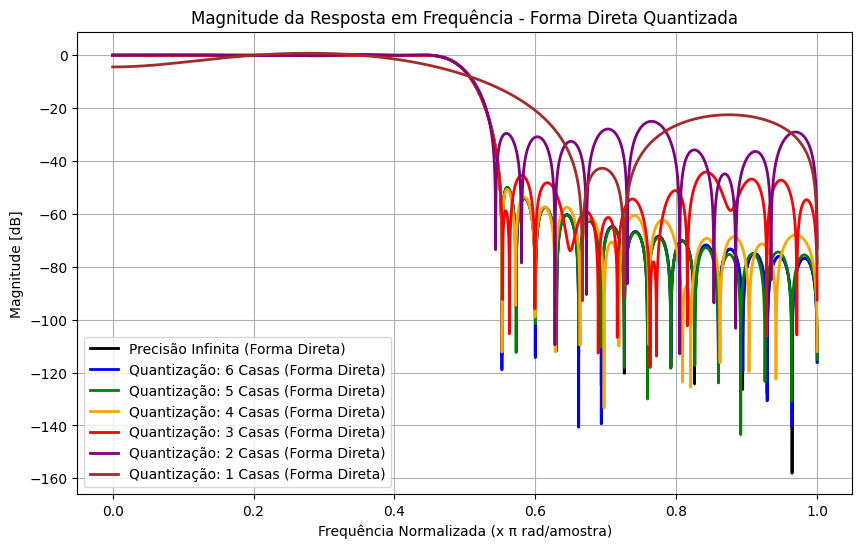

In [54]:
# Atualizar os níveis de quantização para incluir 2 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)",
    "Quantização: 1 Casas (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas na forma direta
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Enquanto a precisão infinita mantém o comportamento ideal, quantizações menores causam distorções progressivas, especialmente nas altas frequências. Com 6 e 5 casas decimais, a resposta permanece estável, mas a partir de 4 casas começam a surgir perturbações. Para 3, 2 e 1 casas, há forte degradação e oscilações acentuadas.  

Na forma direta, o filtro é implementado diretamente a partir da função de transferência, sem decomposição.

Sensibilidade: A forma direta tende a ser mais sensível a erros de quantização, especialmente em filtros de ordem elevada. Isso ocorre porque pequenos erros nos coeficientes podem afetar significativamente a resposta do filtro.

Estabilidade: Em filtros de alta ordem, a forma direta pode ser menos estável numericamente devido ao acúmulo de erros de arredondamento.

Na forma direta, a quantização afeta todos os coeficientes do filtro simultaneamente.
Pequenas alterações nos coeficientes podem provocar mudanças significativas na resposta do filtro, afetando a faixa de transição.
Como os coeficientes são aplicados diretamente em uma única equação, erros acumulados impactam a resposta de frequência globalmente.

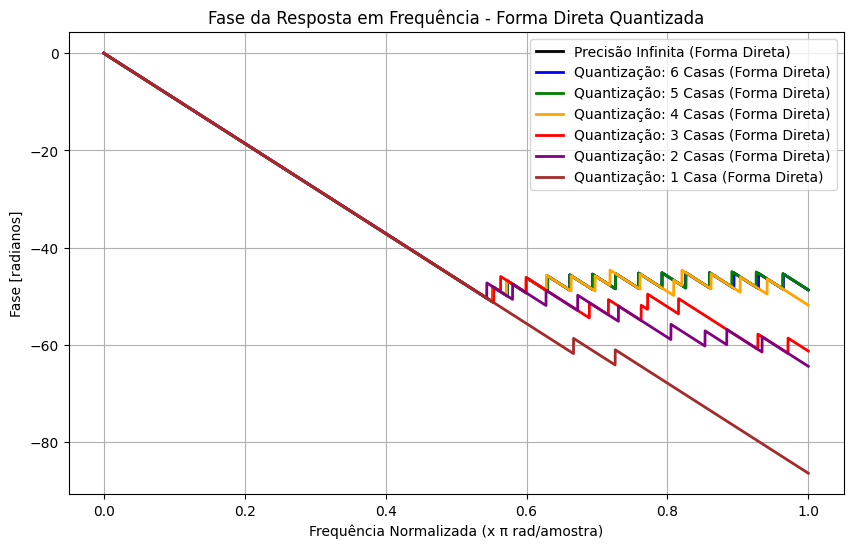

In [55]:
# Adicionar quantizações para 2 e 1 casa decimal
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)",
    "Quantização: 1 Casa (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()


A diferença na fase da resposta em frequência conforme a precisão diminui ocorre devido aos erros de quantização nos coeficientes do filtro FIR. A quantização introduz pequenas variações nos coeficientes, o que altera ligeiramente a posição dos polos e zeros do filtro. Essas variações afetam a fase ao longo da banda de frequência, especialmente nas frequências mais altas, onde o efeito da quantização se torna mais pronunciado. Conforme o número de casas decimais diminui, os erros de arredondamento acumulam-se, resultando em uma fase menos linear e introduzindo distorções perceptíveis

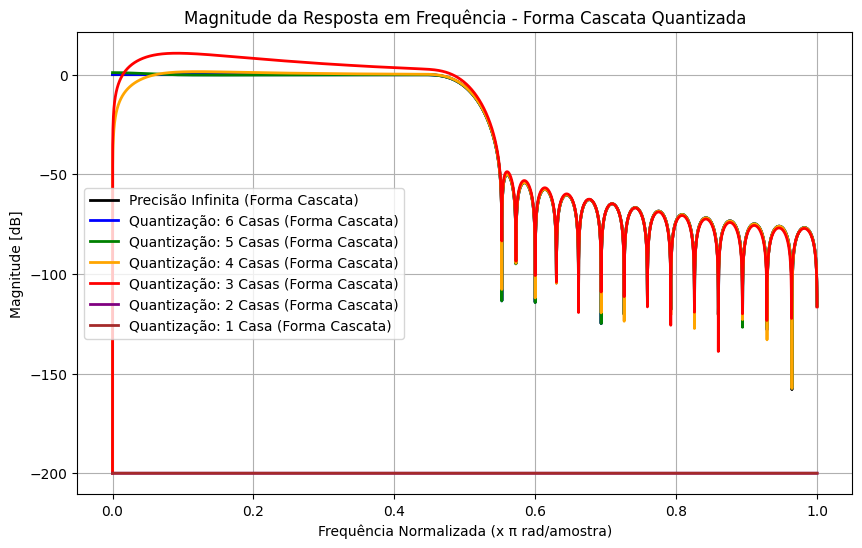

In [61]:
# Criar a figura para um único gráfico com todas as curvas e legenda
plt.figure(figsize=(10, 6))

# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Na forma em cascata, o filtro é decomposto em seções de segunda ordem (ou de primeira ordem, se necessário), conectadas em série.

Sensibilidade: A forma em cascata é geralmente menos sensível a erros de quantização, pois cada seção de segunda ordem é implementada de forma independente, reduzindo a propagação de erros.

Estabilidade: A forma em cascata é mais estável numericamente, especialmente para filtros de alta ordem, pois os polos e zeros são agrupados em seções menores, minimizando problemas de precisão.

### Análise da Sensibilidade à Quantização
Vamos comparar a resposta em frequência do filtro com precisão infinita e com precisão finita

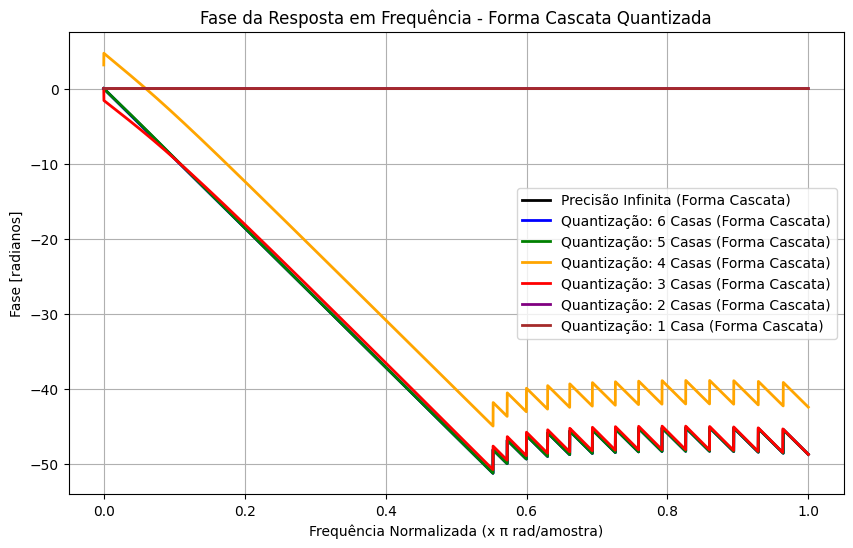

In [73]:
# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

# Definir novos níveis de quantização para 6, 5, 4, 3, 2 e 1 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Cascata)",
    "Quantização: 6 Casas (Forma Cascata)",
    "Quantização: 5 Casas (Forma Cascata)",
    "Quantização: 4 Casas (Forma Cascata)",
    "Quantização: 3 Casas (Forma Cascata)",
    "Quantização: 2 Casas (Forma Cascata)",
    "Quantização: 1 Casa (Forma Cascata)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()

Com base nos gráficos analisados, podemos concluir que a forma direta de implementação de filtros FIR é significativamente mais sensível à quantização dos coeficientes, ou seja, à redução do número de casas decimais. Isso se deve ao fato de que pequenas alterações nos coeficientes afetam diretamente a resposta em frequência do filtro, resultando em mudanças perceptíveis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez à quantização, mantendo uma resposta em frequência mais estável mesmo com a redução do número de casas decimais. Essa diferença ocorre porque a estrutura em cascata divide o filtro em seções de segunda ordem, limitando a propagação de erros e tornando-a mais adequada para implementações em sistemas com precisão finita. Portanto, a forma em cascata é preferível em aplicações práticas onde a quantização dos coeficientes é inevitável.



### Transformações em frequência


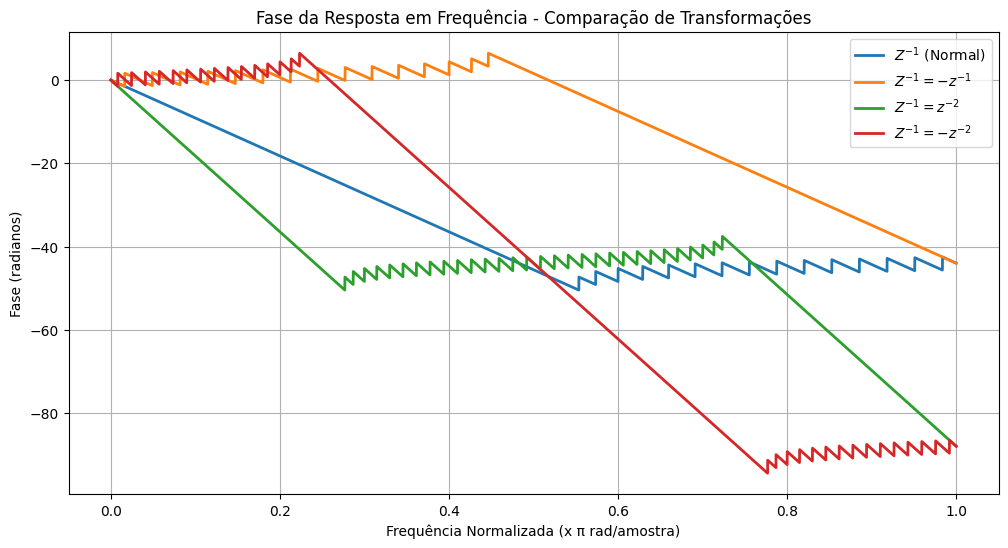

In [58]:
# Reimportar as bibliotecas após o reset do estado
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

# Cálculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar as transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Definir as transformações aplicadas ao filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as fases das transformações
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    fase_resposta = np.unwrap(np.angle(resposta_transformada))  # Corrigir descontinuidades
    plt.plot(w_transf / np.pi, fase_resposta, label=nome, linewidth=2)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()
plt.show()


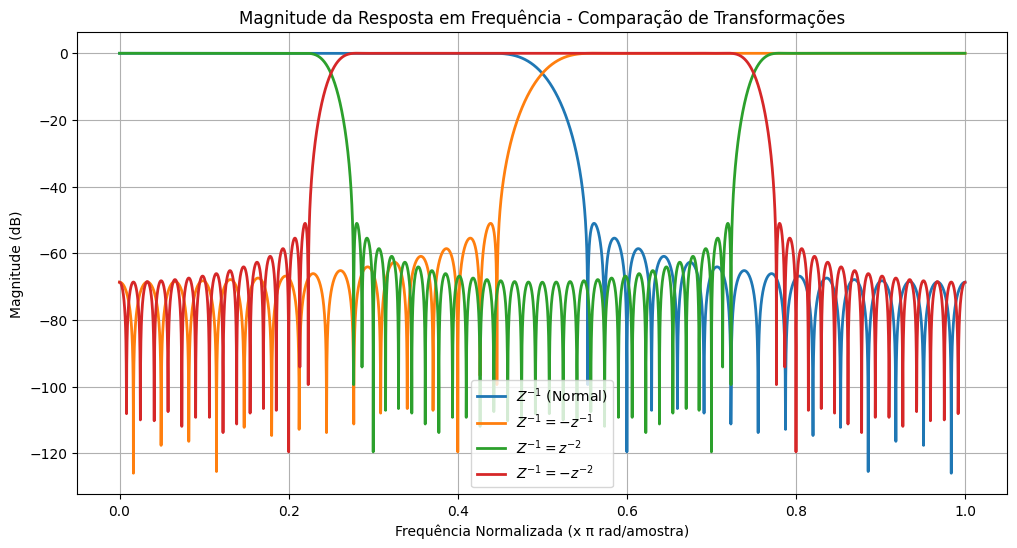

In [59]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro FIR
M = 59  # Ordem do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser (corrigido)

# Criar o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Aplicar as transformações no filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as magnitudes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    magnitude_resposta = np.abs(resposta_transformada)  # Obter a magnitude
    plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()


### Resultados
